## Limpieza de datos

In [1]:
# Importar las librerías a usar
import pandas as pd
import seaborn as sns

In [2]:
#Cargar el archivo CSV
data = pd.read_csv("/Users/cristianrinconbaron/Desktop/Taller2_Analitica/bank-full.csv", delimiter=";")

In [3]:

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#Crear una copia del DF por si algo
datacopy = data

In [5]:
#Revisar que no existan duplicados en el DF
duplicates = len(data[data.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 0


In [6]:
#Revisar que no existan valores faltantes
missing_values = data.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 0


In [7]:
# Tipos de datos en el dataset
types = data.dtypes.value_counts()

print('Number of Features: %d'%(data.shape[1]))
print('Number of Customers: %d'%(data.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 17
Number of Customers: 45211
Data Types and Frequency in Dataset:
object    10
int64      7
Name: count, dtype: int64


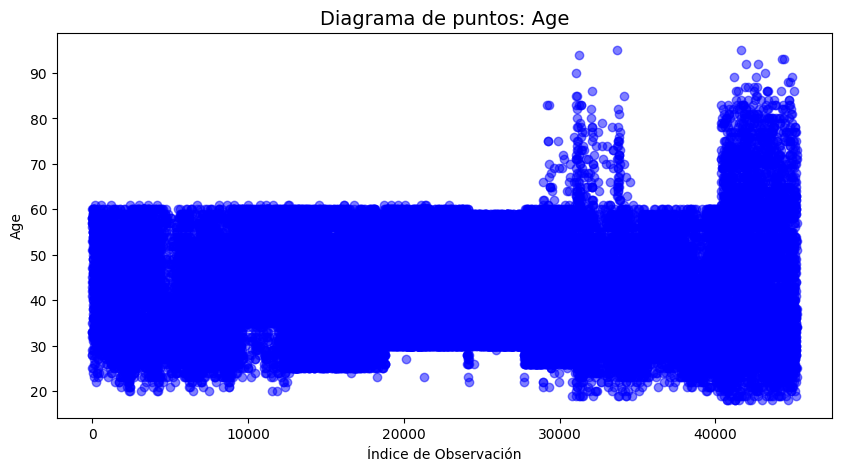

In [20]:
import matplotlib.pyplot as plt

# Seleccionar la variable 'age' si está en los datos numéricos
if 'age' in data.columns:
    # Crear el gráfico para la variable 'age'
    plt.figure(figsize=(10, 5))
    plt.scatter(data.index, data['age'], alpha=0.5, color='blue')
    plt.title('Diagrama de puntos: Age', fontsize=14)
    plt.xlabel('Índice de Observación')
    plt.ylabel('Age')

    # Guardar el gráfico como archivo PNG
    plt.savefig("Diagrama_de_puntos_Age.png")
    plt.show()
else:
    print("La variable 'age' no se encuentra en el conjunto de datos.")


In [9]:
# Seleccionar las columnas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Crear un diccionario para almacenar las estadísticas
numeric_stats = {}

# Para cada columna numérica, calcular min, max y mean
for col in numeric_columns:
    numeric_stats[col] = {
        'mean': data[col].mean(),
        'min': data[col].min(),
        'max': data[col].max()
    }

# Mostrar los resultados
for col, stats in numeric_stats.items():
    print(f"\nEstadísticas de la variable: {col}")
    print(f"Media: {stats['mean']}")
    print(f"Min: {stats['min']}")
    print(f"Max: {stats['max']}")




Estadísticas de la variable: age
Media: 40.93621021432837
Min: 18
Max: 95

Estadísticas de la variable: balance
Media: 1362.2720576850766
Min: -8019
Max: 102127

Estadísticas de la variable: day
Media: 15.80641879188693
Min: 1
Max: 31

Estadísticas de la variable: duration
Media: 258.1630797814691
Min: 0
Max: 4918

Estadísticas de la variable: campaign
Media: 2.763840658246887
Min: 1
Max: 63

Estadísticas de la variable: pdays
Media: 40.19782796222158
Min: -1
Max: 871

Estadísticas de la variable: previous
Media: 0.5803233726305546
Min: 0
Max: 275


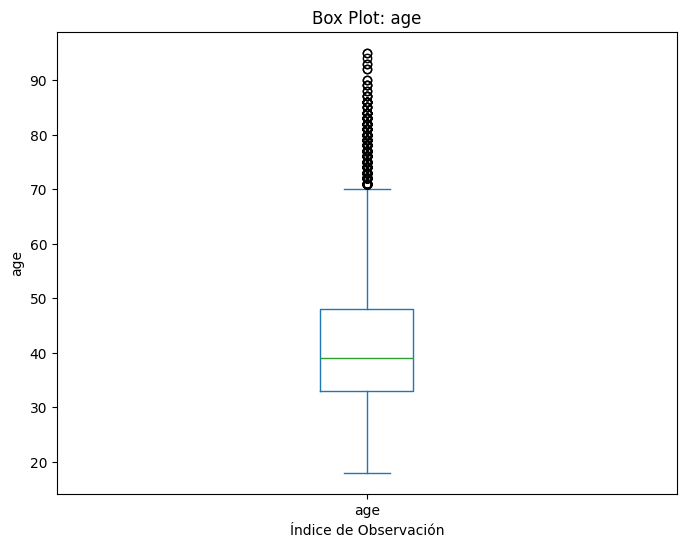

La media de age es: 40.93621021432837


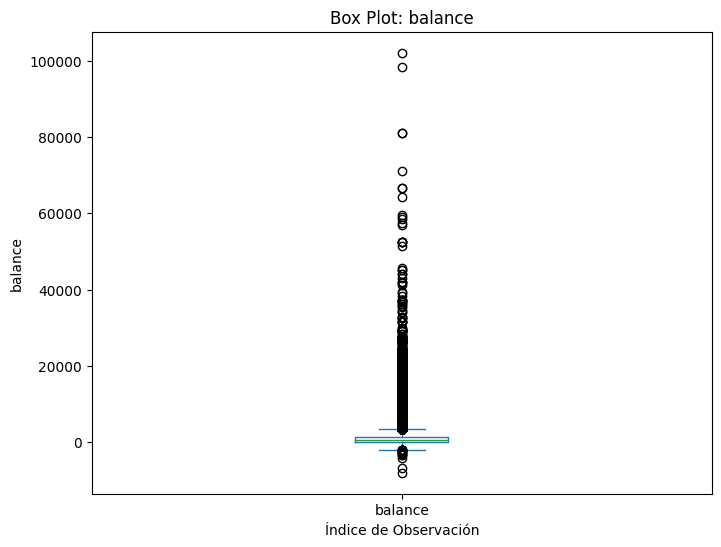

La media de balance es: 1362.2720576850766


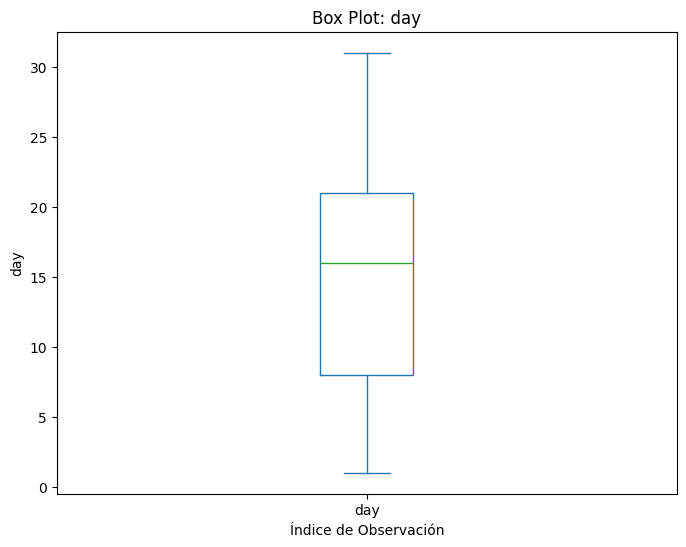

La media de day es: 15.80641879188693


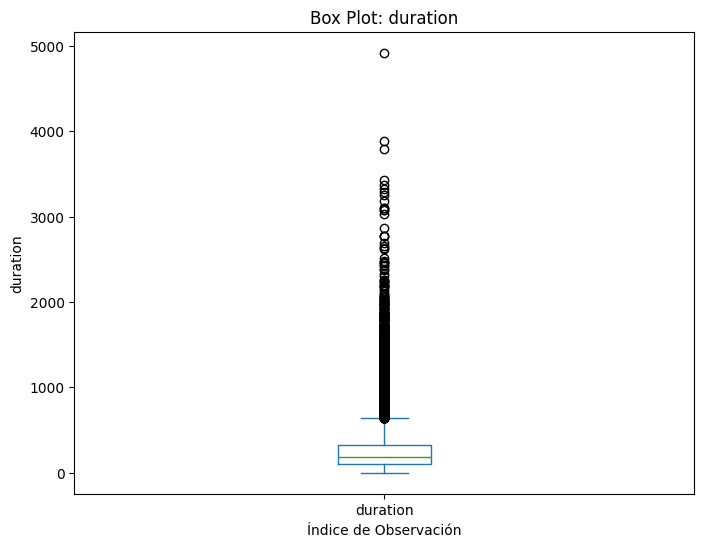

La media de duration es: 258.1630797814691


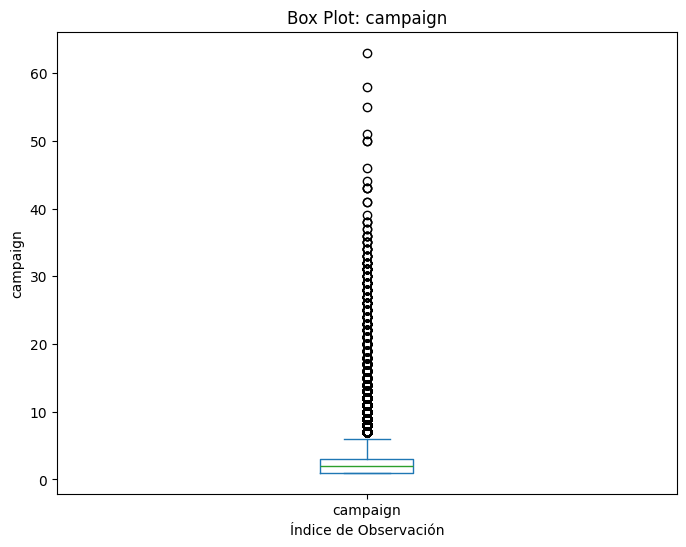

La media de campaign es: 2.763840658246887


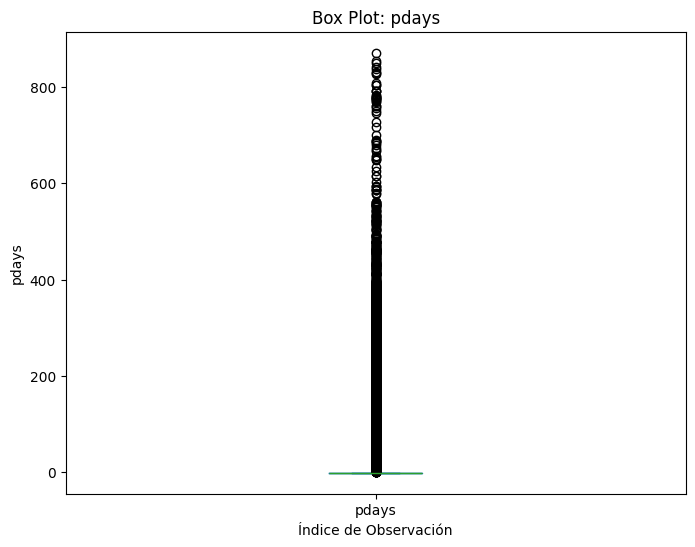

La media de pdays es: 40.19782796222158


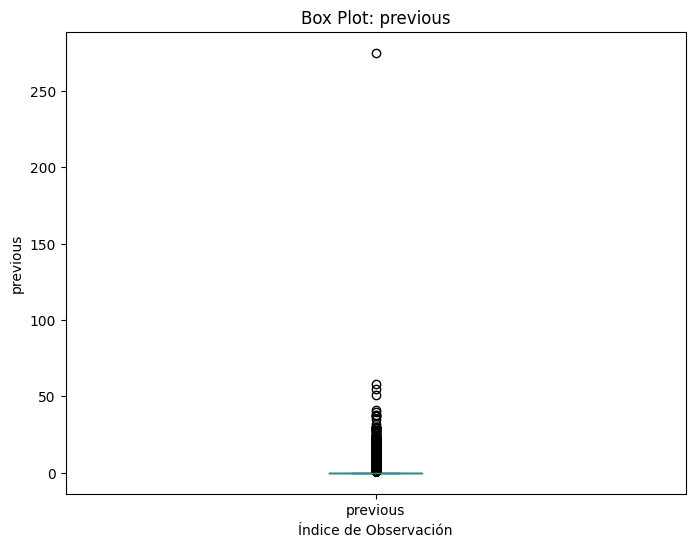

La media de previous es: 0.5803233726305546


In [10]:
import matplotlib.pyplot as plt

# Seleccionar las variables continuas
continuous_variables = data.select_dtypes(include=['float64', 'int64']).columns

# Generar boxplot para cada variable continua e imprimir la media
for column in continuous_variables:
    plt.figure(figsize=(8, 6))
    
    # Generar el boxplot
    data[column].plot(kind='box')
    plt.title(f'Box Plot: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()
    
   #media
    mean_value = data[column].mean()
    print(f'La media de {column} es: {mean_value}')



In [11]:
# import tensorflow as tf
# from tensorflow import keras
# import pandas as pd

# Cargar el archivo CSV
# file_path = '/Users/cristianrinconbaron/Desktop/Taller2_Analitica/bank-full.csv'
# data = pd.read_csv(file_path, delimiter=';')

# Convertir el dataset de pandas a un tf.data.Dataset
# # dataset = tf.data.Dataset.from_tensor_slices((dict(data), data['y']))

# Función para codificar variables categóricas en binario (One-Hot Encoding)
# def encode_categorical_feature(feature, name, dataset, is_string):
    # lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # lookup = lookup_class(output_mode="binary")  # Codificación binaria (similar a One-Hot)

    # Prepara el dataset para la característica
    # feature_ds = dataset.map(lambda x, y: x[name])
    # feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))  # Dejar la característica como un tensor de una dimensión

    # Adaptar el lookup con los datos de la columna
    # lookup.adapt(feature_ds)

    # Aplicar la conversión de las categorías a su codificación binaria
    # encoded_feature = lookup(feature)
    # return encoded_feature

# Variables categóricas del dataset bancario
# categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# # encoded_features = []
# for feature in categorical_features:
    # is_string = True  # Todas nuestras variables categóricas son strings en este caso
    # encoded_feature = encode_categorical_feature(feature, feature, dataset, is_string)
    # encoded_features.append(encoded_feature)

# for feature in encoded_features:
    # print(feature)


In [12]:
import pandas as pd

# Cargar el archivo CSV desde la ruta local
file_path = '/Users/cristianrinconbaron/Desktop/Taller2_Analitica/bank-full.csv'
data = pd.read_csv(file_path, delimiter=';')

# Aplicar One-Hot Encoding a las variables categóricas
data_encoded = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 
                                             'loan', 'contact', 'month', 'poutcome'], drop_first=True)

for column in data_encoded.columns:
    
    if data_encoded[column].dtype == 'object':  # Evitar columnas que son strings
        print(f"Columna {column} contiene valores no numéricos")
    else:
        try:
            # Intentamos convertir las columnas en enteros si son binarias
            data_encoded[column] = data_encoded[column].astype(int)
        except ValueError:
            
            print(f"Error al convertir la columna {column}")

# Verificar las primeras filas después de la transformación
print(data_encoded.head())





Columna y contiene valores no numéricos
   age  balance  day  duration  campaign  pdays  previous   y  \
0   58     2143    5       261         1     -1         0  no   
1   44       29    5       151         1     -1         0  no   
2   33        2    5        76         1     -1         0  no   
3   47     1506    5        92         1     -1         0  no   
4   33        1    5       198         1     -1         0  no   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0                0                 0  ...          0          0          0   
1                0                 0  ...          0          0          0   
2                0                 1  ...          0          0          0   
3                1                 0  ...          0          0          0   
4                0                 0  ...          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          1          0          0 

In [13]:
import pandas as pd


ruta_Archivo = "/Users/cristianrinconbaron/Desktop/Taller2_Analitica/bank_full_encoded.csv"
datos = pd.read_csv(ruta_Archivo, delimiter=",")

# Mover la columna 'y' a la última posición
columnas = list(datos.columns)
columnas.append(columnas.pop(columnas.index('y')))  # Mover la columna 'y' al final
datos = datos[columnas]  # Reorganizar las columnas del DataFrame

# Renombrar las columnas: "X1", "X2", ..., "Y"
new_col_names = ["X" + str(i) for i in range(1, len(datos.columns))]
new_col_names.append("Y")  # Renombrar la última columna como 'Y'
datos.columns = new_col_names

# Reemplazar los valores de "no" por 0 y "yes" por 1 en la columna "Y"
datos["Y"] = datos["Y"].replace({"no": 0, "yes": 1})




/var/folders/8c/xsr49f513zdf03b8v9txxtnh0000gn/T/ipykernel_4898/3910272659.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos["Y"] = datos["Y"].replace({"no": 0, "yes": 1})


Archivo guardado en: /Users/cristianrinconbaron/Desktop/Taller2_Analitica/bank_full_Limpio.csv


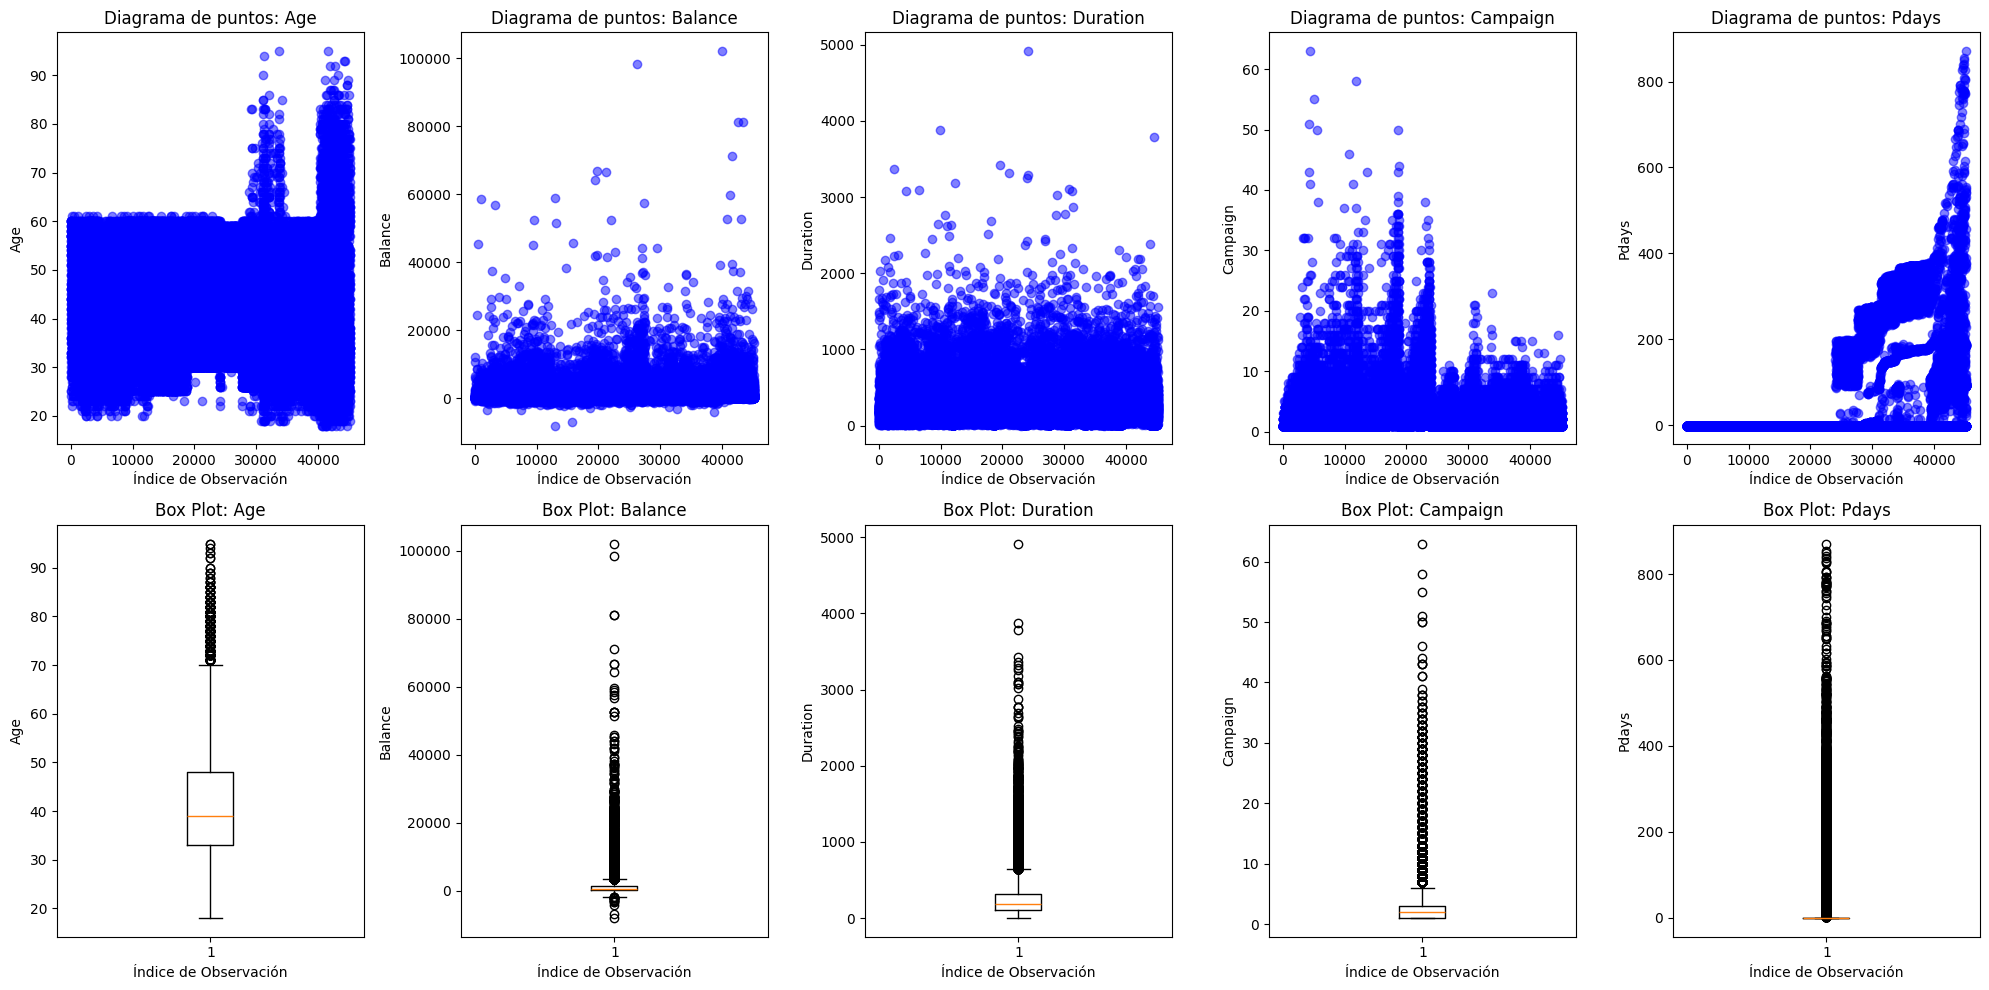

In [19]:
import matplotlib.pyplot as plt

# Preparar el layout de los gráficos con subplots (2 filas, 5 columnas)
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Diagrama de puntos para 'age'
axs[0, 0].scatter(data.index, data['age'], alpha=0.5, color='blue')
axs[0, 0].set_title('Diagrama de puntos: Age')
axs[0, 0].set_xlabel('Índice de Observación')
axs[0, 0].set_ylabel('Age')

# Diagrama de puntos para 'balance'
axs[0, 1].scatter(data.index, data['balance'], alpha=0.5, color='blue')
axs[0, 1].set_title('Diagrama de puntos: Balance')
axs[0, 1].set_xlabel('Índice de Observación')
axs[0, 1].set_ylabel('Balance')

# Diagrama de puntos para 'duration'
axs[0, 2].scatter(data.index, data['duration'], alpha=0.5, color='blue')
axs[0, 2].set_title('Diagrama de puntos: Duration')
axs[0, 2].set_xlabel('Índice de Observación')
axs[0, 2].set_ylabel('Duration')

# Diagrama de puntos para 'campaign'
axs[0, 3].scatter(data.index, data['campaign'], alpha=0.5, color='blue')
axs[0, 3].set_title('Diagrama de puntos: Campaign')
axs[0, 3].set_xlabel('Índice de Observación')
axs[0, 3].set_ylabel('Campaign')

# Diagrama de puntos para 'pdays'
axs[0, 4].scatter(data.index, data['pdays'], alpha=0.5, color='blue')
axs[0, 4].set_title('Diagrama de puntos: Pdays')
axs[0, 4].set_xlabel('Índice de Observación')
axs[0, 4].set_ylabel('Pdays')

# Boxplot para 'age'
axs[1, 0].boxplot(data['age'])
axs[1, 0].set_title('Box Plot: Age')
axs[1, 0].set_xlabel('Índice de Observación')
axs[1, 0].set_ylabel('Age')

# Boxplot para 'balance'
axs[1, 1].boxplot(data['balance'])
axs[1, 1].set_title('Box Plot: Balance')
axs[1, 1].set_xlabel('Índice de Observación')
axs[1, 1].set_ylabel('Balance')

# Boxplot para 'duration'
axs[1, 2].boxplot(data['duration'])
axs[1, 2].set_title('Box Plot: Duration')
axs[1, 2].set_xlabel('Índice de Observación')
axs[1, 2].set_ylabel('Duration')

# Boxplot para 'campaign'
axs[1, 3].boxplot(data['campaign'])
axs[1, 3].set_title('Box Plot: Campaign')
axs[1, 3].set_xlabel('Índice de Observación')
axs[1, 3].set_ylabel('Campaign')

# Boxplot para 'pdays'
axs[1, 4].boxplot(data['pdays'])
axs[1, 4].set_title('Box Plot: Pdays')
axs[1, 4].set_xlabel('Índice de Observación')
axs[1, 4].set_ylabel('Pdays')

# Ajustar el layout
plt.tight_layout()
plt.savefig("Ejemplo_Limpieza_Reporte_Extendido3.png")
plt.show()



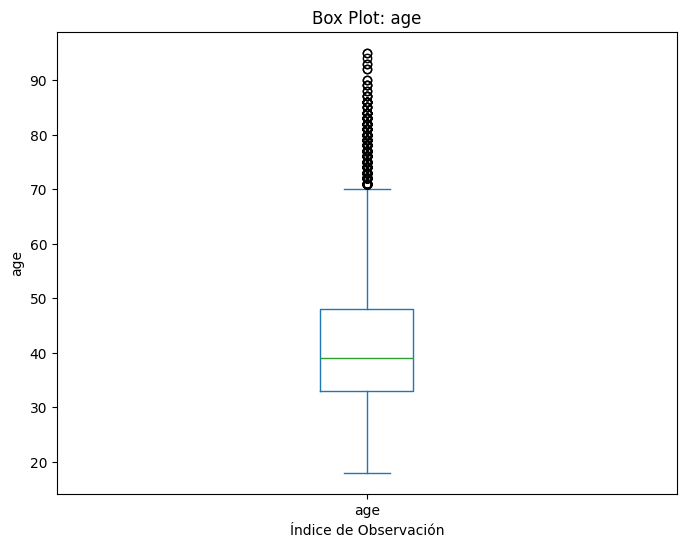

La media de age es: 40.93621021432837
El maximo de age es: 95
El minimo de age es: 18


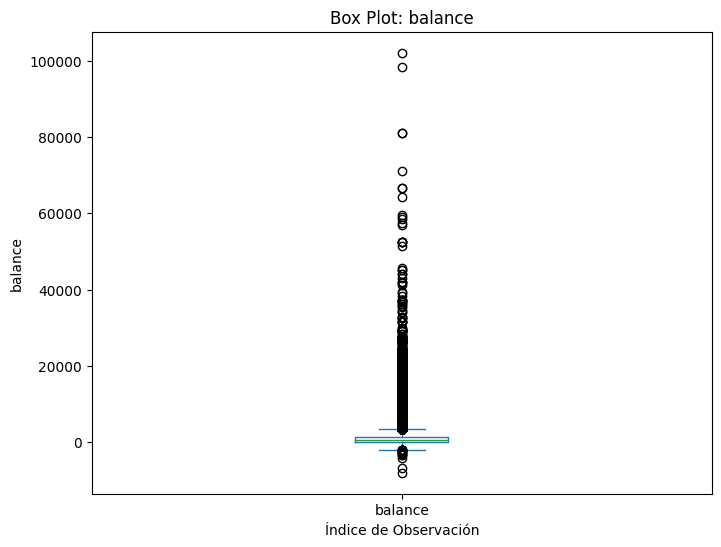

La media de balance es: 1362.2720576850766
El maximo de balance es: 102127
El minimo de balance es: -8019


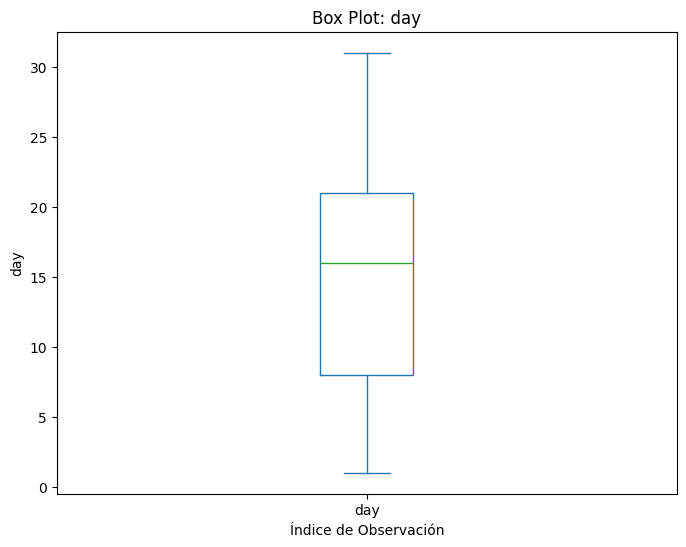

La media de day es: 15.80641879188693
El maximo de day es: 31
El minimo de day es: 1


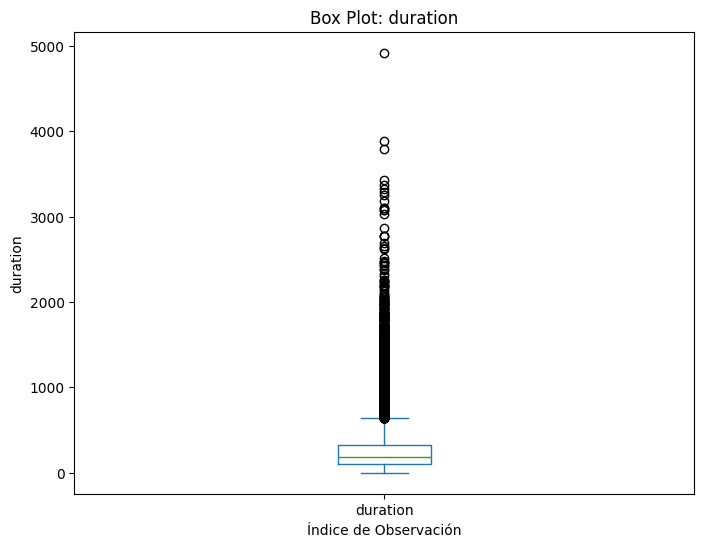

La media de duration es: 258.1630797814691
El maximo de duration es: 4918
El minimo de duration es: 0


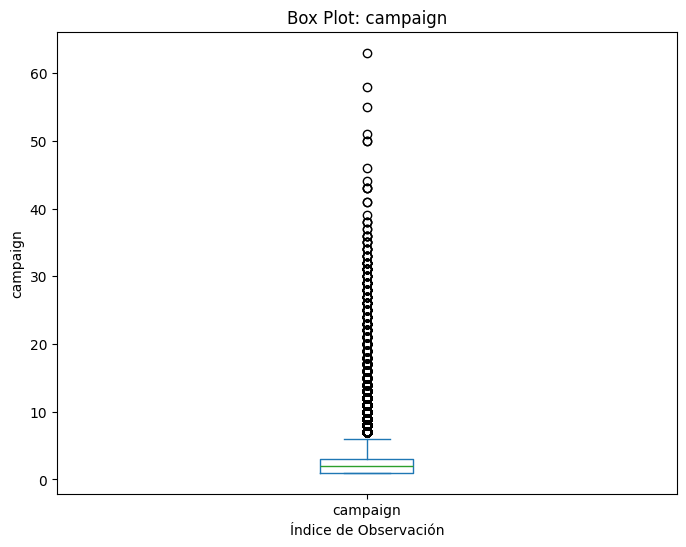

La media de campaign es: 2.763840658246887
El maximo de campaign es: 63
El minimo de campaign es: 1


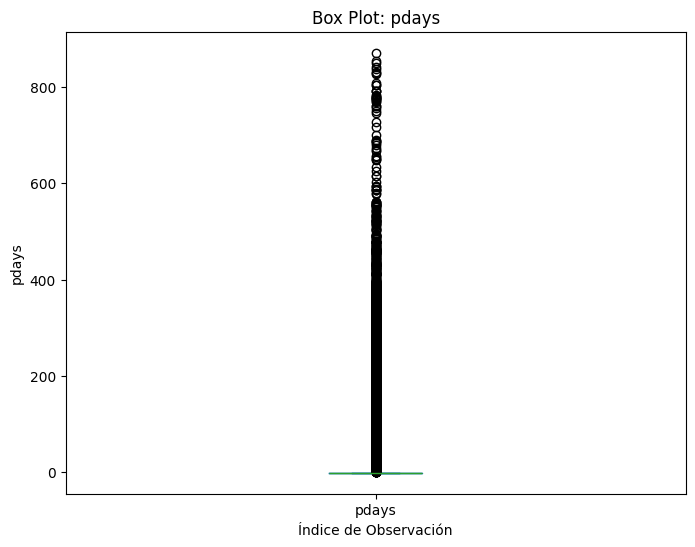

La media de pdays es: 40.19782796222158
El maximo de pdays es: 871
El minimo de pdays es: -1


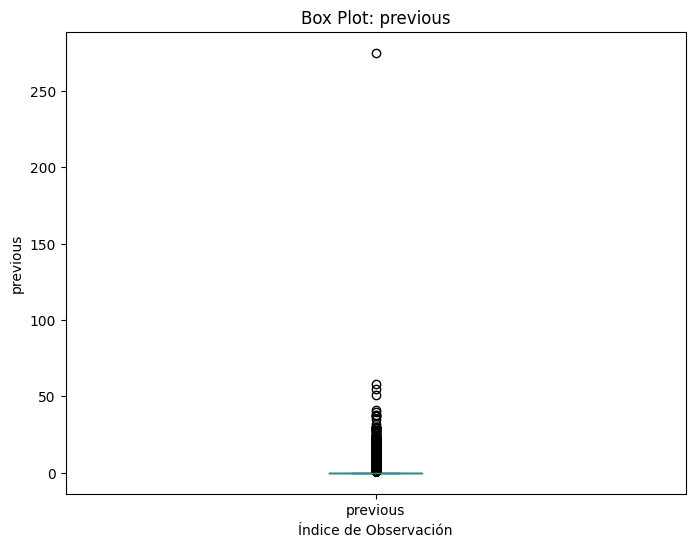

La media de previous es: 0.5803233726305546
El maximo de previous es: 275
El minimo de previous es: 0


In [15]:
import matplotlib.pyplot as plt

# Seleccionar las variables numéricas
numeric_variables = data.select_dtypes(include=['float64', 'int64'])

# Generar boxplot para cada variable numérica e imprimir la media
for column in numeric_variables.columns:
    plt.figure(figsize=(8, 6))
    
    # Generar el boxplot
    data[column].plot(kind='box')
    plt.title(f'Box Plot: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    
    # Mostrar el gráfico
    plt.show()
    
    # Calcular y mostrar la media de la variable
    mean_value = data[column].mean()
    maximo = data[column].max()
    minino = data[column].min()
    print(f'La media de {column} es: {mean_value}')
    print(f'El maximo de {column} es: {maximo}')
    print(f'El minimo de {column} es: {minino}')
